## Task 1B Part 1 – Binning of `height` Attribute

To smooth and analyze the distribution of the `height` attribute, two binning techniques were applied: **Equi-Width Binning** and **Equi-Depth Binning**.

### Height Binning Summary

- **Attribute**: `height`  
- **Original Range**: 60 cm to 198 cm  
- **Total Records**: 11,200  

---

### 1. Equi-Width Binning – Step-by-Step

**Objective**: Divide the range of `height` into **equal-sized intervals**.

- **Number of Bins Chosen**: 5  
- **Bin Width Calculation**:  
  \[
  (198 - 60)/5 = 27.6cm
  \]

**Implementation**:  
- Used the `pd.cut()` function to segment values into 5 equal-width bins.

**Bin Intervals**:
- Bin 1: 60.0 – 87.6  
- Bin 2: 87.6 – 115.2  
- Bin 3: 115.2 – 142.8  
- Bin 4: 142.8 – 170.4  
- Bin 5: 170.4 – 198.0  

**Justification**:  
This method is appropriate because the data is relatively evenly distributed, with no extreme skew or clustering. It allows for **uniform segmentation** across the height range, making comparison between intervals more straightforward.

### 2. Equi-Depth Binning (Quantile-Based) – Step-by-Step

**Objective**: Split the data into bins containing **equal number of records**.

- **Number of Bins Chosen**: 4  
- **Records per Bin**:  
  \[
   11200/4 = 2800 records per bin
  \]

**Implementation**:  
- Used the `pd.qcut()` function to automatically determine bin edges based on quartiles (i.e., 25% intervals).

**Bin Ranges (based on dataset quartiles)**:
- Bin 1: 60.0 – 160.0  
- Bin 2: 160.0 – 165.0  
- Bin 3: 165.0 – 170.0  
- Bin 4: 170.0 – 198.0  

**Justification**:  
Equi-depth binning is ideal when the goal is to ensure **balanced representation** across bins. This method adapts to data density, providing clearer insights when values are not evenly distributed.

### Final Notes

- Both binned versions of `height` were saved to the Excel workbook in **separate columns** for reference.
- Visualizations (histograms and bin frequency charts) were also generated and exported where applicable.
- These preprocessing steps help **summarize attribute trends** and support further exploration or modeling.


In [3]:
import pandas as pd
import numpy as np

# Load the original dataset
df = pd.read_csv("32130_AT2_25544685.csv")

# --- Equi-Width Binning ---
num_bins_width = 5
min_height = df['height'].min()
max_height = df['height'].max()
bin_width = (max_height - min_height) / num_bins_width

# Create bin edges for equi-width
width_bins = np.linspace(min_height, max_height, num_bins_width + 1)
df['height_eq_width_bin'] = pd.cut(df['height'], bins=width_bins, include_lowest=True)

# --- Equi-Depth Binning (Quantile) ---
num_bins_depth = 4
df['height_eq_depth_bin'] = pd.qcut(df['height'], q=num_bins_depth, duplicates='drop')

# Save the result into Excel in a new sheet
with pd.ExcelWriter("fda_a2_25544685.xlsx", engine='openpyxl', mode='a') as writer:
    df[['height', 'height_eq_width_bin', 'height_eq_depth_bin']].to_excel(writer, sheet_name='Height_Binning', index=False)


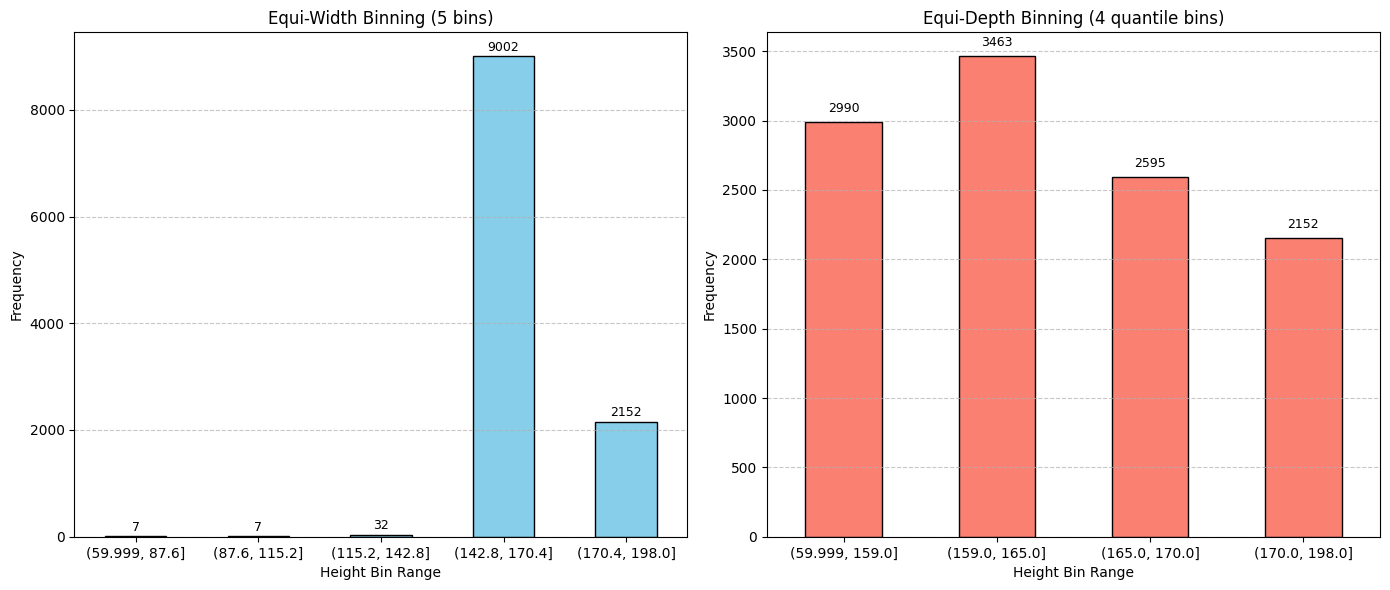

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot side-by-side histograms of height binning results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Equi-Width Binning Histogram ---
width_counts = df['height_eq_width_bin'].value_counts().sort_index()
width_counts.plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black'
)
axes[0].set_title("Equi-Width Binning (5 bins)")
axes[0].set_xlabel("Height Bin Range")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(width_counts):
    axes[0].text(i, count + 50, str(count), ha='center', va='bottom', fontsize=9)

# --- Equi-Depth Binning Histogram ---
depth_counts = df['height_eq_depth_bin'].value_counts().sort_index()
depth_counts.plot(
    kind='bar', ax=axes[1], color='salmon', edgecolor='black'
)
axes[1].set_title("Equi-Depth Binning (4 quantile bins)")
axes[1].set_xlabel("Height Bin Range")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of bars
for i, count in enumerate(depth_counts):
    axes[1].text(i, count + 50, str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Task 1B Part 2 – Normalisation of `weight` Attribute

To standardise the `weight` attribute for further analysis or modeling, two normalisation techniques were applied: **Min-Max** and **Z-Score** normalisation.

### 🔹 Min-Max Normalisation

- **Purpose**:  
  This method scales all weight values into the range **[0, 1]**. It preserves the relative distribution but compresses the range, which is particularly useful for algorithms sensitive to feature magnitudes (e.g. k-NN, SVM).

- **Result Column**: `weight_minmax`


### 🔹 Z-Score Normalisation

- **Purpose**:  
  Z-score normalisation transforms the data so that it has a **mean of 0** and a **standard deviation of 1**. It is beneficial when comparing distributions or working with models that assume standardised data (e.g. logistic regression).

- **Result Column**: `weight_zscore`

---

### 📤 Output

Both normalised columns were saved to the Excel sheet named **`Weight_Normalised`** alongside the original weight values for easy comparison.


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Min-Max Normalization ---
scaler_minmax = MinMaxScaler()
df['weight_minmax'] = scaler_minmax.fit_transform(df[['weight']])

# --- Z-score Normalization ---
scaler_zscore = StandardScaler()
df['weight_zscore'] = scaler_zscore.fit_transform(df[['weight']])

# Export to Excel in a new sheet
with pd.ExcelWriter("fda_a2_25544685.xlsx", engine='openpyxl', mode='a') as writer:
    df[['weight', 'weight_minmax', 'weight_zscore']].to_excel(writer, sheet_name='Weight_Normalised', index=False)


## Visualisation of Normalised `weight` Values

To illustrate the transformation effects of the two normalisation techniques applied to the `weight` attribute, the following line plots have been generated:

- 🔹 **Min-Max Normalised** values compress all weights into the [0, 1] range while preserving the original distribution.
- 🔹 **Z-Score Normalised** values center the data around zero with a standard deviation of one, highlighting deviations from the mean.

These visual comparisons help in understanding how each method affects the data scale and can guide the selection of appropriate preprocessing for modeling tasks.


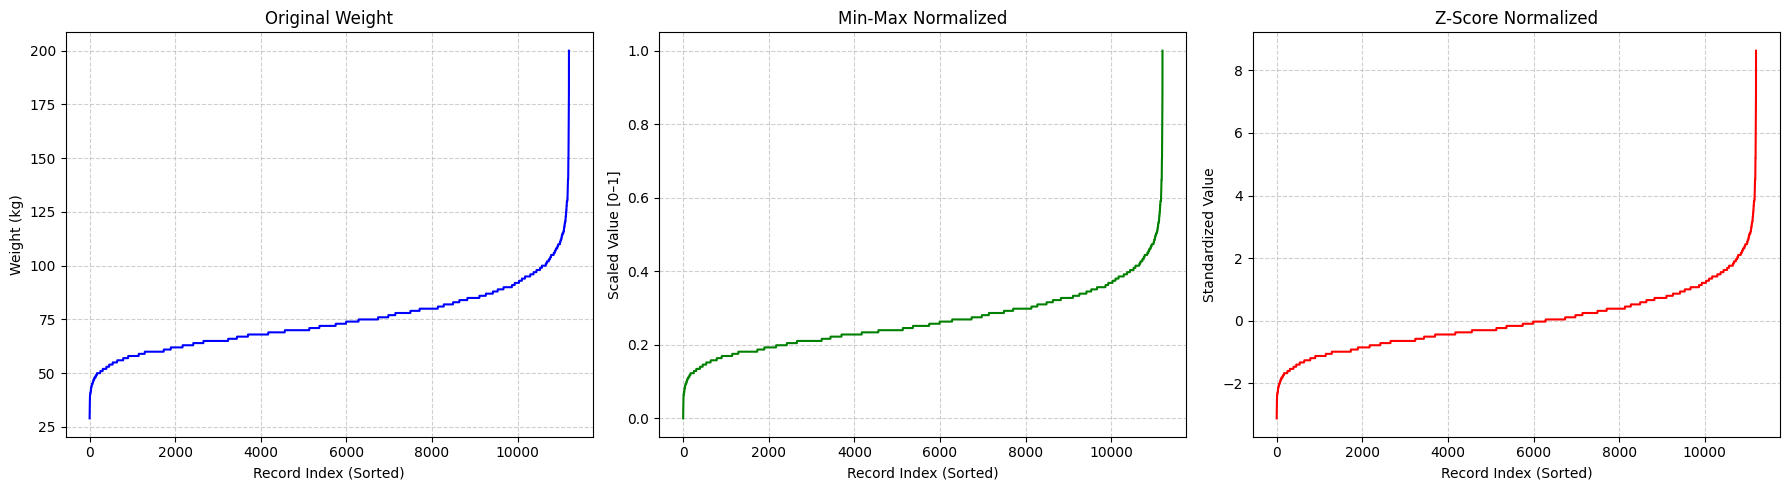

In [16]:
import matplotlib.pyplot as plt

# Sort by weight for consistent x-axis
df_sorted = df[['weight', 'weight_minmax', 'weight_zscore']].sort_values(by='weight').reset_index(drop=True)

# Set up 3 side-by-side line plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Original Weight
axes[0].plot(df_sorted['weight'], color='blue')
axes[0].set_title('Original Weight')
axes[0].set_xlabel('Record Index (Sorted)')
axes[0].set_ylabel('Weight (kg)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Min-Max Normalized
axes[1].plot(df_sorted['weight_minmax'], color='green')
axes[1].set_title('Min-Max Normalized')
axes[1].set_xlabel('Record Index (Sorted)')
axes[1].set_ylabel('Scaled Value [0–1]')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Z-Score Normalized
axes[2].plot(df_sorted['weight_zscore'], color='red')
axes[2].set_title('Z-Score Normalized')
axes[2].set_xlabel('Record Index (Sorted)')
axes[2].set_ylabel('Standardized Value')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### Visualization of Weight Normalization

To visually compare the impact of normalization, three side-by-side line plots were generated—one for the original `weight` values, and one each for the normalized outputs using **Min-Max** and **Z-Score** techniques.

### Key Observations:

- **Original Weight**  
  - The plot shows a steep upward curve near the end, confirming the presence of **high-value outliers** (up to ~200 kg).
  - The overall trend is mildly skewed, reflecting real-world variance in body weight.

- **Min-Max Normalized**  
  - All values are successfully compressed within the **0 to 1** range.
  - While the scale is normalized, the shape of the original distribution is retained.
  - Outliers are squeezed toward the **1.0 boundary**, which may diminish their prominence in certain models.

- **Z-Score Normalized**  
  - Values are centered around **0**, with lower and higher weights deviating symmetrically on both sides.
  - High-weight outliers become more distinguishable, with some exceeding **+8 standard deviations**.
  - This representation emphasizes **relative extremity**, which is useful for outlier detection or standard-based analysis.

### Conclusion:

Both normalization techniques offer unique advantages:
- **Min-Max** is optimal for algorithms sensitive to scale or requiring bounded input.
- **Z-Score** is preferable when understanding how far a value deviates from the mean is important.

These visualizations enhance interpretability and confirm that the applied transformations were successful.


### 3. Discretisation – Age Attribute

Data discretisation is a technique used to convert continuous numeric attributes into categorical intervals or bins. This method reduces the number of unique values, making the data easier to interpret, especially in classification tasks. For this task, the `age` attribute, originally in days, was transformed into years and then grouped into five life stages for meaningful analysis.

The transformation was performed in two steps:
1. Convert age from days to years (by dividing by 365 and rounding).
2. Use `pd.cut()` to discretise the `age_years` into five predefined categories:
   - **Young** (≤ 21 years)
   - **Early Adulthood** (22–34 years)
   - **Early Middle Age** (35–44 years)
   - **Late Middle Age** (45–64 years)
   - **Late Adulthood** (65+ years)

This approach allows for easier group-level comparison and can be useful in identifying how age brackets relate to cardiovascular risk.

Below is the implementation used in Python:


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("32130_AT2_25544685.csv")

# Convert age from days to years (rounded)
df['age_years'] = (df['age'] / 365).round().astype(int)

# Define bins and labels
bins = [0, 21, 34, 44, 64, float('inf')]
labels = ['Young', 'Early Adulthood', 'Early Middle Age', 'Late Middle Age', 'Late Adulthood']

# Discretise age
df['age_category'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=True)

# Show frequency counts
print("Frequency of Age Categories:")
print(df['age_category'].value_counts().sort_index())

# Export selected columns to a new sheet in the existing Excel workbook
with pd.ExcelWriter("fda_a2_25544685.xlsx", engine='openpyxl', mode='a') as writer:
    df[['age', 'age_years', 'age_category']].to_excel(writer, sheet_name='Age_Discretised', index=False)


Frequency of Age Categories:
age_category
Young                  0
Early Adulthood        0
Early Middle Age    1602
Late Middle Age     9541
Late Adulthood        57
Name: count, dtype: int64


### Visualisation: Age Category Distribution

To better understand the distribution of patients across age groups, a bar chart was created showing the frequency of each age category after discretisation. This helps highlight which life stages are most represented in the dataset.

The chart shows that the majority of individuals fall into the "Late Middle Age" (45–64 years) category, followed by "Early Middle Age" (35–44 years). There are very few individuals classified as "Late Adulthood" (65+), and none in the "Young" or "Early Adulthood" brackets. This suggests that the dataset primarily targets middle-aged individuals, aligning with the typical risk profile for cardiovascular disease.


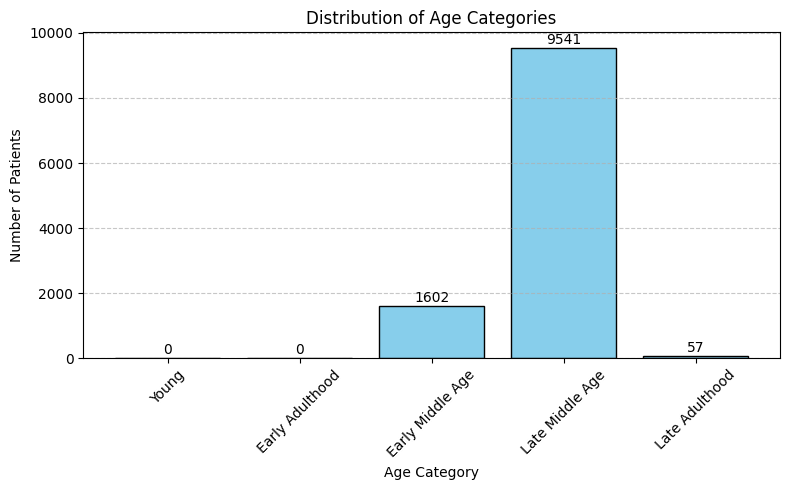

In [9]:
import matplotlib.pyplot as plt

# Count frequencies of each age category
age_counts = df['age_category'].value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 30, str(height),
             ha='center', va='bottom', fontsize=10)

# Chart styling
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Binarisation – `smoke` Attribute

Binarisation is a preprocessing technique used to convert categorical variables with two classes into numeric values, typically `0` and `1`. This transformation is necessary for many machine learning algorithms that require numerical inputs.

In this dataset, the `smoke` attribute contains two string values: `"Yes"` and `"No"`. These were mapped to binary values using the `map()` function, where `"Yes"` was converted to `1` and `"No"` to `0`. This transformation allows for consistent interpretation of the variable as a binary lifestyle indicator.

```python
df['smoke_binary'] = df['smoke'].map({'Yes': 1, 'No': 0})


In [11]:
# Binarise the 'smoke' attribute: 'Yes' -> 1, 'No' -> 0
df['smoke_binary'] = df['smoke'].map({'Yes': 1, 'No': 0})

# Check counts to confirm
print(df['smoke_binary'].value_counts())

# Export to a new sheet in the Excel workbook
with pd.ExcelWriter("fda_a2_25544685.xlsx", engine='openpyxl', mode='a') as writer:
    df[['smoke', 'smoke_binary']].to_excel(writer, sheet_name='Smoke_Binarised', index=False)


smoke_binary
0    10218
1      982
Name: count, dtype: int64


### Visualisation: Binarised `smoke` Attribute

The bar chart above illustrates the distribution of the `smoke` attribute after binarisation. It shows a clear imbalance, with a significantly larger number of patients identified as non-smokers (`0`) compared to smokers (`1`). 

This visual representation confirms the dominance of non-smokers in the dataset, which may impact model training or bias predictions if not handled carefully. Binarising the attribute into numeric form enables compatibility with machine learning algorithms and ensures consistent interpretation during analysis.


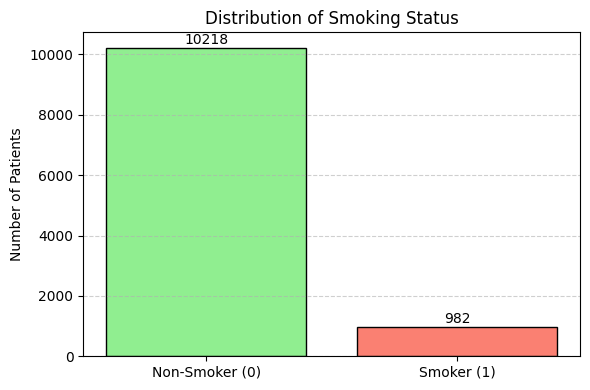

In [13]:
import matplotlib.pyplot as plt

# Re-create the binary column if not already in the DataFrame
df['smoke_binary'] = df['smoke'].map({'Yes': 1, 'No': 0})

# Count of binary values for smoke
smoke_counts = df['smoke_binary'].value_counts().sort_index()
labels = ['Non-Smoker (0)', 'Smoker (1)']

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, smoke_counts.values, color=['lightgreen', 'salmon'], edgecolor='black')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 30, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Smoking Status')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
